# 导言区

In [1]:
import numpy as np
import scipy.constants as sc
from CoolProp.CoolProp import PropsSI as psi
from scipy.optimize import fsolve, root
import sympy as sp
from sympy import Symbol, symbols, diff, Function, dsolve, solve, pi, integrate
from scipy.integrate import quad
import matplotlib.pyplot as plt
from Appendix import Appendix5_air_physical_properties as ap5
from Appendix.Appendix4_lambda_ import get_lambda_
from Functions.SteadyStateConduction import *
from Functions.UnsteadyStateConduction import *
from Appendix import Appendix4_lambda_ as ap4
from Functions.Self_defined import check_Fo
from scipy.integrate import solve_bvp
from scipy.special import iv
from Functions.Self_defined import find_nearest

## 习题03-01

In [2]:
delta = 30e-3
t_0 = 20
t_w = 60
t_m = 56
a_list = np.array([170e-6, 103e-6, 12.9e-6, 0.59e-6, 0.155e-6])

guess_value = 1
tau_list = np.zeros(len(a_list))
for i, a in enumerate(a_list):
    x = delta / 2
    tau = root(lambda tau: t_x_for_constant_t_w(x, tau, t_0, t_w, a) - t_m, guess_value).x[0]
    tau_list[i] = tau
print(f'所需时间分别为：')
for tau in tau_list:
    print(f'{tau:.0f} s')

所需时间分别为：
42 s
69 s
552 s
12075 s
45964 s


## 习题03-09

两种情况下，热电偶的时间常数分别为:36.10 s和 18.05 s


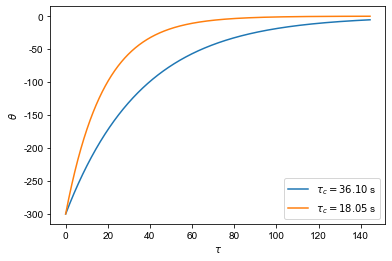

In [3]:
c = 2.094e3
t_0 = 20
t_oo = 320
h_list = np.array([58, 116])
tau_c_list = c / h_list
print(f'两种情况下，热电偶的时间常数分别为:{tau_c_list[0]:.2f} s和 {tau_c_list[1]:.2f} s')
theta_0 = t_0 - t_oo
tau = np.linspace(0, 4*max(tau_c_list), 1000)
fig, ax = plt.subplots()
for tau_c in tau_c_list:
    theta = theta_0 * np.exp(-tau/tau_c)
    ax.plot(tau, theta, label=rf'$\tau_c = {tau_c:.2f}$ s')
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\theta$')
ax.legend()
plt.show()

## 习题03-10

In [4]:
t_0 = 25
t_oo = 200
tau_c = 1
h = 350
lambda_ = 20
c = 400
rho = 8500


def expression(p):
    d = p
    V = 4/3 * np.pi * (d/2)**3
    A = 4 * np.pi * (d/2)**2
    xpr = tau_c - rho * c * V / (h * A)
    return xpr


guess_value = 1
d = root(expression, guess_value).x[0]
print(f'd = {d:.2e} m')
print('如果考虑气流与热接点之间的辐射换热，则h增大，则V/A增大，d增大')

d = 6.18e-04 m
如果考虑气流与热接点之间的辐射换热，则h增大，则V/A增大，d增大


## 习题03-11

In [5]:
m_l = 3.45e-3
c = 460
R_l = 3.63e-2
I = 8

dT_dtau = I**2 * R_l / (m_l * c)
print(f'导线刚通电瞬间的温升率为：{dT_dtau:.2f} C/s')

导线刚通电瞬间的温升率为：1.46 C/s


## 例题03-13

In [6]:
delta = 20e-3
t_0 = 500
t_oo = 20
h = 35
lambda_ = 45
a = 1.37e-5
Delta_t = 10
t = t_oo + Delta_t

l_c = delta / 2
Bi = get_Bi(l_c, lambda_, h)
if Bi < 0.1:
    print(f'可以使用集中参数法')

    theta_m_to_theta_0 = (t - t_oo) / (t_0 - t_oo)
    tau_c = get_tau_c(l_c, lambda_, a, h)
    tau = -tau_c * np.log(theta_m_to_theta_0)
    print(f'所需时间为：{tau:.0f} s')

可以使用集中参数法
所需时间为：3633 s


## 例题03-14

In [7]:
carbon_percentage = 0.5e-2
t_0 = 600
t_oo = 20
m = 7.84
area = 870e-4
c = 418.7
rho = 7840
h = 29.1
Delta_t = 10
t = t_oo + Delta_t

lambda_ = 49.8

V = m / rho
l_c = V / area
Bi = get_Bi(l_c, lambda_, h)
if Bi < 0.1:
    print(f'可以使用集中参数法')
    theta_m_to_theta_0 = (t - t_oo) / (t_0 - t_oo)
    a = get_a(lambda_, rho, c)
    tau_c = get_tau_c(l_c, lambda_, a, h)
    tau = -tau_c * np.log(theta_m_to_theta_0)
    print(f'所需时间为：{tau:.0f} s')

可以使用集中参数法
所需时间为：5265 s


## 例题03-15

In [8]:
t = 500
lambda_ = 210
rho = 7200
c = 420
t_0 = 25
t_oo = 650
tau = 1*60
h = 12

# 先假设满足集中参数法，后续再验证Bi数满足条件
theta_m_to_theta_0 = (t - t_oo) / (t_0 - t_oo)
tau_c = -tau / np.log(theta_m_to_theta_0)
d = 4 * h *tau_c / (rho * c)
print(f'导线的直径应限制在{d*1000:.2f} mm以下')
Bi = h * d / (4*lambda_)
if Bi < 0.1:
    print(f'前面假设的集中参数法适用')
else:
    print(f'前面假设的集中参数法不适用')

导线的直径应限制在0.67 mm以下
前面假设的集中参数法适用


## 例题03-16

In [9]:
d = 20e-3
shape = 'S'
t_0 = 650
t_oo = 20
t_m = 450
dt_dtau_list = np.array([180, 360])
rho = 10500
c = 262
lambda_ = 360

a = get_a(lambda_, rho, c)
tau_list = abs(t_m - t_0) / dt_dtau_list
l_c = d/2   # 后续用到的公式都是基于半径r为特征长度的公式
eta = 0

for i, tau in enumerate(tau_list):
    def expressions(p):
        h = p[0]
        Bi = get_Bi(l_c, lambda_, h)
        mu = get_mu(Bi, shape)
        Fo = get_Fo(tau, l_c, a)
        xpr = (t_m - t_oo)/(t_0 - t_oo) - theta_to_theta_0_ratio(mu, eta, Fo, shape)
        return xpr


    guess_values = 3000
    h = root(expressions, guess_values).x[0]
    print(f'({i+1}) h = {h:.0f} W/m^2-K')

    Fo = get_Fo(tau, l_c, a)
    check_Fo(Fo)

(1) h = 3450 W/m^2-K
(2) h = 7621 W/m^2-K


## 例题03-17

In [10]:
shape = 'C'
T_oo = 1e4
D_p = 50e-6
rho = 3970
lambda_ = 11
c = 1560
h = 10000
T_melt = 2350
gamma = 3580e3

T_0 = 300

l_c = D_p / 2
theta_m_to_0 = (T_melt - T_oo) / (T_0 - T_oo)
eta = 0
Bi = get_Bi(l_c, lambda_, h)
if Bi < 1/30:
    print(f'可以使用集中参数法')
    tau = - rho * c * D_p / (6 * h) * np.log(theta_m_to_0)
    print(f'加热到其熔点所需的时间为：{tau:.3e} s')
# 也可以不用集中参数法，利用下面代码直接计算：
# mu_v = mu(Bi_v, shape)
# guess_value = 1
# Fo_v = root(lambda Fo_v: theta_m_to_0 - theta_to_theta_0_ratio(mu_v, eta, Fo_v, shape), guess_value).x[0]
# guess_value2 = 1
# a_v = a(lambda_, rho, c)
# tau = root(lambda tau_v: Fo_v - Fo(tau_v, l_c, a_v), guess_value2).x[0]
# print(f'加热到其熔点所需的时间为：{tau:.3e} s')

V = 4/3 * np.pi * (D_p/2)**3
m = rho * V
Q = m * gamma
Delta_T = T_oo - T_melt
A = 4 * np.pi * (D_p/2)**2
Delta_tau = Q / (h * A * Delta_T)
print(f'从刚到达熔点直至全部熔为液滴所需的时间为：{Delta_tau:.3e} s')

可以使用集中参数法
加热到其熔点所需的时间为：1.225e-03 s
从刚到达熔点直至全部熔为液滴所需的时间为：1.548e-03 s


## 例题03-18

t = 108.34 C


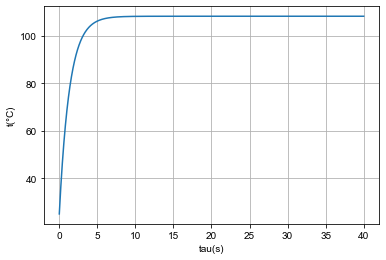

温度升高到107.34°C所需的时间为6.0 s


In [11]:
d = 1e-3
t_oo = 25
R_l = 0.01
I = 120
h = 550
Delta_t = 1

c = 500
rho = 8000
lambda_ = 25

guess_values = t_oo + 1
t_balance = root(lambda t: h * np.pi * d * (t - t_oo) - I**2 * R_l, guess_values).x[0]
print(f't = {t_balance:.2f} C')


# dt_dtau = \dfrac{I^2 R_l - \pi h d (t - t_oo)}{\pi c \rho d^2 / 4}
def derivative(x, t):
    return np.vstack((t[1], -(I**2 * R_l - h * np.pi * d * (t[0] - t_oo)) / (np.pi * c * rho * d**2 / 4)))


# 定义边界条件，t(0) = t_oo, t(np.inf) = t
# 边界条件函数的t_a和t_b参数为边界条件的起始和终止点
def bc(t_a, t_b):
    return np.array([t_a[0] - t_oo, t_b[1]])


N = 1000
tau_oo = 40
tau = np.linspace(0, tau_oo, N)
t = np.zeros((2, tau.size))
t[0, 0] = t_oo
result = solve_bvp(derivative, bc, tau, t)

x_plot = np.linspace(0, tau_oo, N)
t_plot = result.sol(x_plot)[0]
plt.plot(x_plot, t_plot)
plt.grid()
plt.xlabel('tau(s)')
plt.ylabel('t(°C)')
plt.show()

t_search = t_balance - Delta_t
arg = find_nearest(t_plot, t_search)
print(f'温度升高到{t_search:.2f}°C所需的时间为{x_plot[arg]:.1f} s')

## 习题03-23

In [12]:
l_1 = 10e-2
l_2 = 5e-2
t_0 = 20
t_oo = 200
h = 125
tau = 6*60
rho = 7820
c = 460
lambda_ = 15.2

# 其他面绝热，因此可将问题简化为厚度为2*l_2的对称无限大平板处理
l_c = l_2
x = 0
shape = 'P'

a = get_a(lambda_, rho, c)
Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
Fo = get_Fo(tau, l_c, a)
eta = x / l_c
ratio_m_to_0 = theta_to_theta_0_ratio(mu, eta, Fo, shape)
t = t_oo + ratio_m_to_0 * (t_0 - t_oo)
print(f't = {t:.2f} C')

check_Fo(Fo)

t = 46.87 C


## 习题03-24

In [13]:
H = 0.4
h = 50
lambda_ = 20
a = 5.6e-6

# 由于圆柱侧面绝热，该问题可以等效为无限大平板，l_c = H/2
shape = 'P'
l_c = H/2
Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
eta = 0


def expressions(p):
    tau = p
    Fo = get_Fo(tau, l_c, a)
    xpr = theta_to_theta_0_ratio(mu, eta, Fo, shape) - 0.5
    return xpr


guess_values = 1
tau = root(expressions, guess_values).x[0]
print(f'圆桂体中心过余温度下降到初值一半所需要的时间为{tau:.0f} s')

Fo = get_Fo(tau, l_c, a)
check_Fo(Fo)

圆桂体中心过余温度下降到初值一半所需要的时间为12736 s


## 习题03-25

In [14]:
t_0 = 1000
t_oo = 5
h = 1135
tau = 5*60
delta = 50e-3
lambda_ = 56.8
a = 4.13e-6

# 由于内侧面绝热，该问题可以等效为无限大平板，l_c = delta
l_c = delta
shape = 'P'
Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
Fo = get_Fo(tau, l_c, a)
t_delta = t_oo + (t_0 - t_oo) * theta_to_theta_0_ratio(mu, 1, Fo, shape)
t_m = t_oo + (t_0 - t_oo) * theta_to_theta_0_ratio(mu, 0, Fo, shape)
print(f'表面温度为 {t_delta:.2f} C')
print(f'内侧温度为 {t_m:.2f} C')

check_Fo(Fo)

表面温度为 508.47 C
内侧温度为 776.73 C


## 习题03-26

In [15]:
delta = 8e-3
t_0 = -15
t_oo = 25
h = 4.4
t_m = 10
lambda_ = 1.1
a = 7.5e-7

# 该问题可以等效为无限大平板，l_c = delta/2
l_c = delta/2
shape = 'P'

Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
eta = 0


def expressions(p):
    tau = p[0]
    Fo = get_Fo(tau, l_c, a)
    xpr = (t_m - t_oo) / (t_0 - t_oo) - theta_to_theta_0_ratio(mu, eta, Fo, shape)
    return xpr


guess_values = 1
tau = root(expressions, guess_values, method='lm').x[0]
print(f'tau = {tau:.0f} s')

Fo = get_Fo(tau, l_c, a)
check_Fo(Fo)

l_c_1 = delta

Bi_1 = get_Bi(l_c_1, lambda_, h)
mu_1 = get_mu(Bi_1, shape)
eta_1 = 0


def expressions(p):
    tau = p[0]
    Fo_1 = get_Fo(tau, l_c_1, a)
    xpr = (t_m - t_oo) / (t_0 - t_oo) - theta_to_theta_0_ratio(mu_1, eta_1, Fo_1, shape)
    return xpr


guess_values = 1
tau_1 = root(expressions, guess_values, method='lm').x[0]
print(f'tau_1 = {tau_1:.0f} s')

Fo_1 = get_Fo(tau, l_c_1, a)
check_Fo(Fo_1)

tau = 1318 s
tau_1 = 2658 s


## 习题03-28

In [16]:
delta = 300e-3
t_0 = 20
t_oo = 1200
a = 5.55e-6
h = 290
Delta_t = 15
lambda_ = 49.8
shape = 'P'

t_surface = t_oo - Delta_t

l_c = delta
Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)


def expressions(p):
    tau = p
    Fo = get_Fo(tau, l_c, a)
    xpr = t_surface - t_oo - (t_0 - t_oo) * theta_to_theta_0_ratio(mu, 1, Fo, shape)
    return xpr


guess_value = [1]
tau = root(expressions, guess_value).x[0]
print(f'tau = {tau:.0f} s')

Fo = get_Fo(tau, l_c, a)
t_m = t_oo + (t_0 - t_oo) * theta_to_theta_0_ratio(mu, 0, Fo, shape)
Delta_t_tau = t_surface - t_m
print(f'此时钢板两表面的温差为{Delta_t_tau:.0f} C')

Fo = get_Fo(tau, l_c, a)
check_Fo(Fo)

tau = 58148 s
此时钢板两表面的温差为14 C


## 习题03-29

In [17]:
delta = 3e-2/2
t_0 = 150
t_w = 30
a = 2e-6


def theta_ratio(delta, x, tau, number_to_calculate):
    sum = 0
    for n in range(1, number_to_calculate+1):
        # 课本上的公式有误
        sum += 1/n * np.exp(-(n*np.pi/(2*delta))**2 * a*tau) * np.sin(n * np.pi * x / (2*delta))
    return 4/np.pi * sum


tau = 1*60

result1 = theta_ratio(delta, delta, tau, 1)
print(f'取一项的结果为：theta_ratio = {result1:.6f}')
result2 = theta_ratio(delta, delta, tau, 4)
print(f'取四项的结果为：theta_ratio = {result2:.6f}')
t_m = t_w + result1 * (t_0 - t_w)
print(f't_m = {t_m:.2f} C')

取一项的结果为：theta_ratio = 0.341508
取四项的结果为：theta_ratio = 0.341505
t_m = 70.98 C


## 习题03-30

In [18]:
T_oo = 2300
T_m = 1500
delta = 10e-3
lambda_ = 10
a = 6e-6
h = 2500
T_0 = 300

# 保守估计时，认为陶瓷和喷管之间绝热
# 此时可将陶瓷层看做无限大平板处理
l_c = delta
shape = 'P'

Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)


def expressions(p):
    tau = p
    Fo = get_Fo(tau, l_c, a)
    xpr = T_m - T_oo - (T_0 - T_oo) * theta_to_theta_0_ratio(mu, 0, Fo, shape)
    return xpr


guess_value = 1
tau = root(expressions, guess_value).x[0]
print(f'tau = {tau:.0f} s')

Fo = get_Fo(tau, l_c, a)
check_Fo(Fo)

tau = 14 s


## 习题03-31

In [19]:
delta = 9e-3
t_0 = 30
h = 1950
rho = 8400
c = 560
lambda_ = 24.6
t_oo = 1750
t_w = 1000

l_c = delta
shape = 'P'

Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
a = get_a(lambda_, rho, c)


def expressions(p):
    tau = p
    Fo = get_Fo(tau, l_c, a)
    xpr = t_w - t_oo - (t_0 - t_oo) * theta_to_theta_0_ratio(mu, 1, Fo, shape)
    return xpr


guess_value = [1]
tau = root(expressions, guess_value).x[0]
print(f'(1) tau = {tau:.0f} s')

Fo = get_Fo(tau, l_c, a)
t_m = t_oo + (t_0 - t_oo) * theta_to_theta_0_ratio(mu, 0, Fo, shape)
Delta_t = t_w - t_m
print(f'(2) Delta_t = {Delta_t:.2f} C')

average = Delta_t / delta
# 由于在壁面处热流密度最大，所以壁面处温度梯度最大
# q = lambda_ * partial_t / partial_x = h * (t_oo - t_0)
max = h * (t_oo - t_w) / lambda_
print(f'(3) 平均温度梯度为 {average:.2f} C/m, 最大温度梯度为 {max:.2f} C/m')

check_Fo(Fo)

(1) tau = 16 s
(2) Delta_t = 281.06 C
(3) 平均温度梯度为 31228.34 C/m, 最大温度梯度为 59451.22 C/m


## 习题03-32

In [20]:
r = 2e-2
dt_dtau = -0.5
lambda_ = 43
a = 1.2e-5

dPhi_dr = - 2 * np.pi * lambda_ * r / a * dt_dtau
print(f'dPhi_dr = {dPhi_dr:.0f} W/m')
if dPhi_dr > 0:
    print('方向由圆柱的中心指向外侧')
else:
    print('方向由圆柱的外侧指向中心')

dPhi_dr = 225147 W/m
方向由圆柱的中心指向外侧


## 习题03-33

In [21]:
d = 20e-2
t_0 = 20
t_oo = 100
tau = 10*60
t_m = 80
rho = 8440
c = 377
lambda_ = 109

shape = 'C'
l_c = d/2


def expressions(p):
    h = p[0]
    Bi = get_Bi(l_c, lambda_, h)
    mu = get_mu(Bi, shape)
    eta = 0
    a = get_a(lambda_, rho, c)
    Fo = get_Fo(tau, l_c, a)
    xpr = t_m - t_oo - (t_0 - t_oo) * theta_to_theta_0_ratio(mu, eta, Fo, shape)
    return xpr


guess_values = 1
h = root(expressions, guess_values).x[0]
print(f'h = {h:.2f} W/m^2-K')

a = get_a(lambda_, rho, c)
Fo = get_Fo(tau, l_c, a)
check_Fo(Fo)

h = 430.79 W/m^2-K


## 习题03-34

In [22]:
d = 170e-3
t_0 = 17
t_oo = 850
lambda_ = 30
a = 6.2e-6
h = 141

t_m = 800

shape = 'C'
l_c = d/2


def expressions(p):
    tau = p[0]
    Bi = get_Bi(l_c, lambda_, h)
    mu = get_mu(Bi, shape)
    eta = 0
    Fo = get_Fo(tau, l_c, a)
    xpr = t_m - t_oo - (t_0 - t_oo) * theta_to_theta_0_ratio(mu, eta, Fo, shape)
    return xpr


guess_values = 1
tau = root(expressions, guess_values).x[0]
print(f'tau = {tau:.0f} s')

Fo = get_Fo(tau, l_c, a)
check_Fo(Fo)

tau = 4669 s


## 习题03-35

In [23]:
d = 40e-2
t_0 = 600
t_oo = 30
t_surface = 450
h = 18.5
lambda_ = 22.3
a = 8.8e-6

shape = 'C'
l_c = d/2


def expressions(p):
    tau = p[0]
    Bi = get_Bi(l_c, lambda_, h)
    mu = get_mu(Bi, shape)
    eta = 1
    Fo = get_Fo(tau, l_c, a)
    xpr = t_surface - t_oo - (t_0 - t_oo) * theta_to_theta_0_ratio(mu, eta, Fo, shape)
    return xpr


guess_values = 1
tau = root(expressions, guess_values).x[0]
print(f'tau = {tau:.0f} s')

tau = 3763 s


## 习题03-36

2小时后: t_s = 1219.96 C, t_m = 1004.92 C
3小时后: t_s = 1316.43 C, t_m = 1216.61 C
4小时后: t_s = 1361.21 C, t_m = 1314.87 C
5小时后: t_s = 1381.99 C, t_m = 1360.49 C


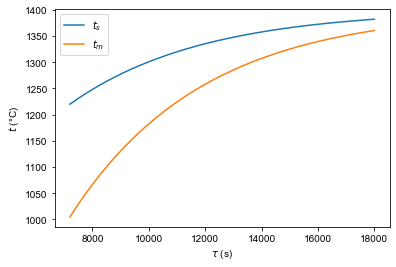

In [24]:
t_0 = 30
t_oo = 1400
d = 600e-3
tau_list = np.arange(2, 6) * 3600
lambda_ = 43.5
a = 7.5e-6
h = 290

shape = 'C'
l_c = d/2
t_s_list = np.zeros(len(tau_list))
t_m_list = np.zeros(len(tau_list))
for i, tau in enumerate(tau_list):
    Bi = get_Bi(l_c, lambda_, h)
    mu = get_mu(Bi, shape)
    Fo = get_Fo(tau, l_c, a)
    t_s = t_oo + (t_0 - t_oo) * theta_to_theta_0_ratio(mu, 1, Fo, shape)
    t_s_list[i] = t_s
    t_m = t_oo + (t_0 - t_oo) * theta_to_theta_0_ratio(mu, 0, Fo, shape)
    t_m_list[i] = t_m
    print(f'{int(tau/3600)}小时后: t_s = {t_s:.2f} C, t_m = {t_m:.2f} C')

tau = np.linspace(2*3600, 5*3600, 100000)
Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
Fo = get_Fo(tau, l_c, a)
t_s = t_oo + (t_0 - t_oo) * theta_to_theta_0_ratio(mu, 1, Fo, shape)
t_m = t_oo + (t_0 - t_oo) * theta_to_theta_0_ratio(mu, 0, Fo, shape)

fig, ax = plt.subplots()
ax.plot(tau, t_s, label='$t_s$')
ax.plot(tau, t_m, label='$t_m$')
ax.set_xlabel(r'$\tau$ (s)')
ax.set_ylabel('$t$ (°C)')
plt.legend()
plt.show()

check_Fo(*Fo)

## 习题03-37

In [25]:
d = 500e-3
height = 800e-3
t_0 = 30
t_oo = 1200
h = 180
lambda_ = 40
a = 8e-6
tau = 3*3600
x = 400e-3
r = 0.13
shape = ['P', 'C']

# 先考虑厚度方向，作为无限大平板进行分析
l_c_1 = height / 2
Bi_1 = h * l_c_1 / lambda_
Fo_1 = get_Fo(tau, l_c_1, a)
mu_1 = get_mu(Bi_1, shape[0])
eta_1 = 0
ratio_m_to_0_1 = theta_to_theta_0_ratio(mu_1, eta_1, Fo_1, shape[0])
check_Fo(Fo_1)

# 再考虑径向，作为无限长圆柱进行分析
l_c_2 = d / 2
Bi_2 = get_Bi(l_c_2, lambda_, h)
Fo_2 = get_Fo(tau, l_c_2, a)
mu_2 = get_mu(Bi_2, shape[1])
eta_2 = 0
ratio_m_to_0_2 = theta_to_theta_0_ratio(mu_2, eta_2, Fo_2, shape[1])
check_Fo(Fo_2)

ratio_m_to_0 = ratio_m_to_0_1 * ratio_m_to_0_2
t_m = t_oo + ratio_m_to_0 * (t_0 - t_oo)
print(f't_m = {t_m:.2f} C')

t_m = 1114.28 C


## 习题03-38

In [26]:
d = 30e-3
lambda_ = 0.3
rhoc = 1050e3
t = 200
tau = 3*60
t_oo = 150
h = 8.5
shape = 'C'

l_c = d/2

Bi = get_Bi(l_c, lambda_, h)
a = lambda_ / rhoc
mu = get_mu(Bi, shape)
eta = 1
Fo = get_Fo(tau, l_c, a)
ratio_m_to_0 = theta_to_theta_0_ratio(mu, eta, Fo, shape)
t_0 = t_oo + (t - t_oo) / ratio_m_to_0
print(f't_0 = {t_0:.2f} C')

check_Fo(Fo)

t_0 = 216.33 C


## 习题03-39

In [27]:
d = 25e-3
shape = 'C'
R_l = 0.10
T_0 = 800
T_oo = 300
h = 120
T_m = 500
rho = 2600
c = 808
lambda_ = 3.98

l_c = d/2

h_p = 1 / (1/h + R_l*np.pi*d)
Bi = get_Bi(l_c, lambda_, h_p)
a = get_a(lambda_, rho, c)
mu = get_mu(Bi, shape)
eta = 0


def expressions(p):
    tau = p
    Fo = get_Fo(tau, l_c, a)
    ratio_m_to_0 = theta_to_theta_0_ratio(mu, eta, Fo, shape)
    xpr = ratio_m_to_0 - (T_m - T_oo) / (T_0 - T_oo)
    return xpr


guess_values = np.ones(1)
tau = root(expressions, guess_values).x[0]
print(f'tau = {tau:.0f} s')

Fo = get_Fo(tau, l_c, a)
check_Fo(Fo)

tau = 215 s


## 习题03-40

In [28]:
shape = 'S'
t_oo = 250
d = 5e-2
t_0 = 20

t_a = 50
material = 'water'

tau = 20*60
h = 20

T_a = sc.convert_temperature(t_a, 'C', 'K')
P_a = sc.atm
rho = psi('D', 'T', T_a, 'P', P_a, material)
c = psi('C', 'T', T_a, 'P', P_a, material)
lambda_ = psi('L', 'T', T_a, 'P', P_a, material)

l_c = d/2

Bi = get_Bi(l_c, lambda_, h)
a = get_a(lambda_, rho, c)
mu = get_mu(Bi, shape)
eta = 1
Fo = get_Fo(tau, l_c, a)
ratio_s_to_0 = theta_to_theta_0_ratio(mu, eta, Fo, shape)
t = t_oo + (t_0 - t_oo) * ratio_s_to_0

print(f't = {t:.2f} C')

check_Fo(Fo)

t = 142.51 C


## 习题03-41

In [29]:
shape = 'S'
d = 10e-2
t_0 = 250
t_oo = 10
h = 200
t_m = 150
lambda_ = 44.8
a = 1.229e-5

l_c = d/2

Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
eta = 0


def expressions(p):
    tau = p
    Fo = get_Fo(tau, l_c, a)
    ratio_m_to_0 = theta_to_theta_0_ratio(mu, eta, Fo, shape)
    xpr = t_m - t_oo - (t_0 - t_oo) * ratio_m_to_0
    return xpr


guess_values = np.ones(1)
tau = root(expressions, guess_values).x[0]
print(f'tau = {tau:.0f} s')
Fo = get_Fo(tau, l_c, a)
ratio_s_to_0 = theta_to_theta_0_ratio(mu, 1, Fo, shape)
t_s = t_oo + (t_0 - t_oo) * ratio_s_to_0
print(f'T_s = {t_s:.2f} C')

check_Fo(Fo)

tau = 191 s
T_s = 135.53 C


## 习题03-42

In [30]:
shape = 'S'
T_x = 1000
T_oo = 1300
h = 5000
d = 20e-3
T_0 = 300
delta = 1e-3
x = d/2 - delta
rho = 7800
c = 500
lambda_ = 50

l_c = d/2

Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
a = get_a(lambda_, rho, c)
eta = x / l_c


def expressions(p):
    tau = p
    Fo = get_Fo(tau, l_c, a)
    ratio_x_to_0 = theta_to_theta_0_ratio(mu, eta, Fo, shape)
    xpr = T_x - T_oo - (T_0 - T_oo) * ratio_x_to_0
    return xpr


guess_values = np.ones(1)
tau = root(expressions, guess_values).x[0]
print(f'tau = {tau:.1f} s')

Fo = get_Fo(tau, l_c, a)
check_Fo(Fo)

tau = 3.4 s


## 习题03-43

In [31]:
shape = 'S'
r = 0.15
t_0 = 30
lambda_ = 0.8
c = 840
rho = 2750
t_oo = 410
h = 10.5
tau = 8*3600

l_c = r

Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
a = get_a(lambda_, rho, c)
eta = 1
Fo = get_Fo(tau, l_c, a)
ratio_s_to_0 = theta_to_theta_0_ratio(mu, eta, Fo, shape)
t_s = t_oo + (t_0 - t_oo) * ratio_s_to_0
print(f't_s = {t_s:.0f} s')

check_Fo(Fo)

t_s = 369 s


## 习题03-44

In [32]:
t_0 = 10
t_oo = -5
shape = 'S'
d = 6e-2
t_a = 5
material = 'Water'
h = 7
tau = 8*3600
t_s = 0

l_c = d/2

T_a = sc.convert_temperature(t_a, 'C', 'K')
P_a = sc.atm
rho = psi('D', 'T', T_a, 'P', P_a, material)
c = psi('C', 'T', T_a, 'P', P_a, material)
lambda_ = psi('L', 'T', T_a, 'P', P_a, material)

Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
a = get_a(lambda_, rho, c)
eta = 1


def expressions(p):
    tau = p
    Fo = get_Fo(tau, l_c, a)
    ratio_s_to_0 = theta_to_theta_0_ratio(mu, eta, Fo, shape)
    xpr = t_s - t_oo - (t_0 - t_oo) * ratio_s_to_0
    return xpr


guess_values = np.ones(1)
tau = root(expressions, guess_values).x[0]
print(f'tau = {tau:.0f} s')

Fo = get_Fo(tau, l_c, a)
check_Fo(Fo)

tau = 6613 s


## 习题03-45

In [33]:
shape = 'S'
d = 10e-2
t_0 = 20
t_oo = 80
tau = np.array([0.5, 2]) * 3600
h = 35
lambda_ = 2.2
a = 1.13e-6
c = 780
rho = 2643  # 缺少条件，这里取花岗石的密度

l_c = d/2

Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
eta = 0
Fo = get_Fo(tau, l_c, a)
ratio_m_to_0 = theta_to_theta_0_ratio(mu, eta, Fo, shape)
t_m = t_oo + (t_0 - t_oo) * ratio_m_to_0
ratio_Q_m_to_0 = Q_to_Q_0_ratio(mu, Fo, shape)
V = 4/3 * (d/2)**3

# 如果卵石按照正六面体顶点及其中心布置的方式堆放，则每层卵石的数量相等，相邻两层卵石的高度差相等
distance1 = 2*d/np.sqrt(3)  # 同层两相邻卵石之间的距离
distance = distance1/2  # 相邻两层卵石中心平面之间的距离
# 单位高度的层数
layer_number = 1 / distance
# 每层单位面积的卵石数量
n_layer = (1/distance1)**2
# 单位体积的卵石数量为
n = layer_number * n_layer
V_n = n * V

Q_0 = rho * c * V_n * abs(t_0 - t_oo)
Q = ratio_Q_m_to_0 * Q_0

print(f'半小时后，卵石的中心温度为:{t_m[0]:.2f} C，卵石的储热量为：{Q[0]:.0f} J')
print(f'两小时后，卵石的中心温度为:{t_m[1]:.2f} C，卵石的储热量为：{Q[1]:.0f} J')

check_Fo(*Fo)

半小时后，卵石的中心温度为:66.06 C，卵石的储热量为：21738917 J
两小时后，卵石的中心温度为:79.90 C，卵石的储热量为：26745581 J


## 习题03-46

In [34]:
shape = 'S'
T_0 = 600
T_oo = 300
d_A = 200e-3
d_B = 20e-3
rho_A = 1600
rho_B = 400
c_A = 0.4e3
c_B = 1.6e3
lambda_A = 170
lambda_B = 1.7
h_A = 5
h_B = 50
T = 415

l_c_A = d_A / 2
l_c_B = d_B / 2

Bi_A = get_Bi(l_c_A, lambda_A, h_A)
Bi_B = get_Bi(l_c_B, lambda_B, h_B)
mu_A = get_mu(Bi_A, shape)
mu_B = get_mu(Bi_B, shape)
a_A = get_a(lambda_A, rho_A, c_A)
a_B = get_a(lambda_B, rho_B, c_B)


def expressions(p):
    tau_As, tau_Bs, tau_Am, tau_Bm = p
    Fo_As = get_Fo(tau_As, l_c_A, a_A)
    Fo_Bs = get_Fo(tau_Bs, l_c_B, a_B)
    Fo_Am = get_Fo(tau_Am, l_c_A, a_A)
    Fo_Bm = get_Fo(tau_Bm, l_c_B, a_B)
    ratio_As_to_0 = theta_to_theta_0_ratio(mu_A, 1, Fo_As, shape)
    xpr1 = T - T_oo - (T_0 - T_oo) * ratio_As_to_0
    ratio_Bs_to_0 = theta_to_theta_0_ratio(mu_B, 1, Fo_Bs, shape)
    xpr2 = T - T_oo - (T_0 - T_oo) * ratio_Bs_to_0
    ratio_Am_to_0 = theta_to_theta_0_ratio(mu_A, 0, Fo_Am, shape)
    xpr3 = T - T_oo - (T_0 - T_oo) * ratio_Am_to_0
    ratio_Bm_to_0 = theta_to_theta_0_ratio(mu_B, 0, Fo_Bm, shape)
    xpr4 = T - T_oo - (T_0 - T_oo) * ratio_Bm_to_0
    return xpr1, xpr2, xpr3, xpr4


guess_values = np.ones(4)
tau_As, tau_Bs, tau_Am, tau_Bm = root(expressions, guess_values).x
print(f'A球表面冷却到{T} K所需的时间为{tau_As:.0f} s')
print(f'B球表面冷却到{T} K所需的时间为{tau_Bs:.0f} s')
print(f'A球中心冷却到{T} K所需的时间为{tau_Am:.0f} s')
print(f'B球中心冷却到{T} K所需的时间为{tau_Bm:.0f} s')

Fo_As = get_Fo(tau_As, l_c_A, a_A)
Fo_Bs = get_Fo(tau_Bs, l_c_B, a_B)
Fo_Am = get_Fo(tau_Am, l_c_A, a_A)
Fo_Bm = get_Fo(tau_Bm, l_c_B, a_B)

check_Fo(Fo_As, Fo_Bs, Fo_Am, Fo_Bm)

A球表面冷却到415 K所需的时间为4091 s
B球表面冷却到415 K所需的时间为41 s
A球中心冷却到415 K所需的时间为4097 s
B球中心冷却到415 K所需的时间为47 s


## 习题03-47

In [35]:
shape = 'S'
t_0 = -30
d = 5e-3
t_oo = 5
t_s = 0
h = 240
c = 2040
rho = 921
lambda_ = 2.56

l_c = d/2
Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
a = get_a(lambda_, rho, c)


def expressions(p):
    tau = p
    Fo = get_Fo(tau, l_c, a)
    xpr = t_s - t_oo - (t_0 - t_oo) * theta_to_theta_0_ratio(mu, 1, Fo, shape)
    return xpr


guess_value = np.ones(1)
tau = root(expressions, guess_value).x[0]
print(f'tau = {tau:.0f} s')

Fo = get_Fo(tau, l_c, a)
t_m = t_oo + (t_0 - t_oo) * theta_to_theta_0_ratio(mu, 0, Fo, shape)
print(f't_m = {t_m:.2f} C')

check_Fo(Fo)

tau = 13 s
t_m = -0.61 C


## 习题03-48

In [36]:
t_0 = 30
t_w = 100
x = 10e-3
tau = 2*60
t_x = 65
rho = 2200
c = 700


def expressions(p):
    lambda_ = p
    a = get_a(lambda_, rho, c)
    xpr = t_x - t_x_for_constant_t_w(x, tau, t_0, t_w, a)
    return xpr


guess_value = np.ones(1)
lambda_ = root(expressions, guess_value).x[0]
print(f'lambda = {lambda_:.2f} W/m-K$')

lambda = 1.41 W/m-K$


## 习题03-49

In [37]:
# 人对温度的感知由热流密度决定，比较二者的热流密度即可
# 而在接触面两边，人体皮肤中的热流密度等于触摸物中的热流密度
# 只需要比较两种情况下触摸物表面热流密度的相对大小即可
# 由于短时间内皮肤表面温度不会下降太多，可以把该问题看做半无限大平板第一类边界条件下的热流密度的求解问题
t_0 = 20
rho_1 = 545
lambda_1 = 0.17
c_1 = 2385
rho_2 = 7820
lambda_2 = 18
c_2 = 460

a_1 = get_a(lambda_1, rho_1, c_1)
a_2 = get_a(lambda_2, rho_2, c_2)

# # 假定人体皮肤的温度为37.5°C，人体在0.2s后感应出冷热
# t_w = 37.5
# tau = 0.2
#
#
# q_1 = q_x_for_constant_t_w(0, tau, t_0, t_w, lambda_1, a_1)
# q_2 = q_x_for_constant_t_w(0, tau, t_0, t_w, lambda_2, a_2)
# ratio = q_1 / q_2

# 根据式3-38， 对于x=0，两种情况下触摸物表面热流密度之比ratio为
ratio = lambda_1/lambda_2 * np.sqrt(a_2/a_1)
if 0 < ratio < 1:
    print('钢制家具感觉更冷一些')
elif ratio >= 1:
    print('木制家具感觉更冷一些')
else:
    print('计算错误')

钢制家具感觉更冷一些


## 习题03-50

In [38]:
t_0 = 50
t_w = 20
tau = 10*60
rho = 2300
c = 880
lambda_ = 1.4

a = get_a(lambda_, rho, c)
Q = Q_s_for_constant_t_w(tau, t_0, t_w, lambda_, a)
print(f'Q = {-Q:.0f} J')
print('这一假设使计算得到的放热偏高')

Q = 1395794 J
这一假设使计算得到的放热偏高


## 习题03-51

In [39]:
a = 1.65e-7
t_0 = 15
t_w = -20
tau = 50*24*3600
t_x = 0

guess_value = np.ones(1)
x = root(lambda x: t_x - t_x_for_constant_t_w(x, tau, t_0, t_w, a),
         guess_value).x[0]
print(f'x = {x:.3f} m')

x = 0.945 m


## 习题03-52

当热源温度为60 C, 烧伤深度为0.007 m
当热源温度为70 C, 烧伤深度为0.009 m
当热源温度为80 C, 烧伤深度为0.011 m
当热源温度为90 C, 烧伤深度为0.012 m
当热源温度为100 C, 烧伤深度为0.013 m


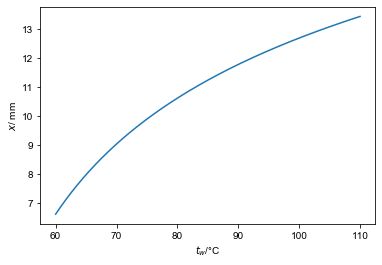

In [40]:
t_max = 48
tau_s = 10
t_w_list = np.arange(60, 110, 10)
t_0 = 37
tau_t = 5*60
material = 'Water'

T_0 = sc.convert_temperature(t_0, 'C', 'K')
rho = psi('D', 'T', T_0, 'P', sc.atm, material)
lambda_ = psi('L', 'T', T_0, 'P', sc.atm, material)
c = psi('C', 'T', T_0, 'P', sc.atm, material)
a = get_a(lambda_, rho, c)

tau = tau_t - tau_s

guess_value = 0.01
x_list = np.zeros(len(t_w_list))
for i, t_w in enumerate(t_w_list):
    x = root(lambda x: t_max - t_x_for_constant_t_w(x, tau, t_0, t_w, a),
             guess_value).x[0]
    x_list[i] = x
[print(f'当热源温度为{t_w} C, 烧伤深度为{x:.3f} m') for t_w, x in zip(t_w_list, x_list)]

t_w_lt = np.linspace(60, 110, 1000)
x_lt = np.zeros(len(t_w_lt))
for i, t_w in enumerate(t_w_lt):
    x = root(lambda x: t_max - t_x_for_constant_t_w(x, tau, t_0, t_w, a),
             guess_value).x[0]
    x_lt[i] = x

fig, ax = plt.subplots()
ax.plot(t_w_lt, x_lt*1000)
ax.set_xlabel('$t_w$/°C')
ax.set_ylabel('$x$/ mm')
plt.show()

## 习题03-53

In [41]:
t_w = 70
t_0 = 25
delta = 6e-3
x = 2e-3
t_x = 30
a = 4e-7

guess_value = np.ones(1)
tau = root(lambda tau: t_x - t_x_for_constant_t_w(x, tau, t_0, t_w, a),
           guess_value).x[0]
print(f'tau = {tau:.1f} s')

tau = 2.0 s


## 习题03-54

In [42]:
t_0 = 25
t_oo = 425
shape = 'P'
h = 6.5
tau = 4 * sc.hour + 50 * sc.minute + 24
length = 0.1
rho = 810
c = 2550
lambda_ = 0.65
l_c = length/2


a = get_a(lambda_, rho, c)
Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
eta = 1
Fo = get_Fo(tau, l_c, a)
ratio_s_to_0 = theta_to_theta_0_ratio(mu, eta, Fo, shape)
ratio = ratio_s_to_0**3
t = t_oo + (t_0 - t_oo) * ratio
print(f'T = {t:.2f} C')

check_Fo(Fo)

T = 410.19 C


## 习题03-55

In [43]:
t_0 = 30
t_oo = 5
shape = ['P', 'C']
h = 10
t_m = 10
d = 50e-3
height = 120e-3
material = 'Water'
l_c_1 = height/2
l_c_2 = d/2

t_a = (t_0 + t_m)/2
T_a = sc.convert_temperature(t_a, 'C', 'K')
lambda_ = psi('L', 'T', T_a, 'P', sc.atm, material)
rho = psi('D', 'T', T_a, 'P', sc.atm, material)
c = psi('C', 'T', T_a, 'P', sc.atm, material)

a = get_a(lambda_, rho, c)
Bi_1 = get_Bi(l_c_1, lambda_, h)
Bi_2 = get_Bi(l_c_2, lambda_, h)
mu_1 = get_mu(Bi_1, shape[0])
mu_2 = get_mu(Bi_2, shape[1])
eta_1 = 0
eta_2 = 0


def expressions(p):
    tau = p
    Fo_1 = get_Fo(tau, l_c_1, a)
    ratio_m_to_0_1 = theta_to_theta_0_ratio(mu_1, eta_1, Fo_1, shape[0])
    Fo_2 = get_Fo(tau, l_c_2, a)
    ratio_m_to_0_2 = theta_to_theta_0_ratio(mu_2, eta_2, Fo_2, shape[1])
    ratio_m_to_0 = ratio_m_to_0_1 * ratio_m_to_0_2
    xpr = ratio_m_to_0 - (t_m - t_oo) / (t_0 - t_oo)
    return xpr


guess_values = np.ones(1)
tau = root(expressions, guess_values).x[0]
print(f'tau = {tau:.0f} s')

Fo_1 = get_Fo(tau, l_c_1, a)
Fo_2 = get_Fo(tau, l_c_2, a)
check_Fo(Fo_1, Fo_2)

tau = 8967 s


## 习题03-56

In [44]:
d = 0.15
height = 0.05
t_0 = 30
t_oo = 450
h = 9.5
t_m = 400
shape = ['P', 'C']
l_c_1 = height/2
l_c_2 = d/2

lambda_ = 0.78
rho = 2700
c = 835

a = get_a(lambda_, rho, c)
Bi_1 = get_Bi(l_c_1, lambda_, h)
Bi_2 = get_Bi(l_c_2, lambda_, h)
mu_1 = get_mu(Bi_1, shape[0])
mu_2 = get_mu(Bi_2, shape[1])
eta_1 = 0
eta_2 = 0


def expressions(p):
    tau = p
    Fo_1 = get_Fo(tau, l_c_1, a)
    ratio_m_to_0_1 = theta_to_theta_0_ratio(mu_1, eta_1, Fo_1, shape[0])
    Fo_2 = get_Fo(tau, l_c_2, a)
    ratio_m_to_0_2 = theta_to_theta_0_ratio(mu_2, eta_2, Fo_2, shape[1])
    ratio_m_to_0 = ratio_m_to_0_1 * ratio_m_to_0_2
    xpr = ratio_m_to_0 - (t_m - t_oo) / (t_0 - t_oo)
    return xpr


guess_values = np.ones(1)
tau = root(expressions, guess_values).x[0]
print(f'tau = {tau:.0f} s')

Fo_1 = get_Fo(tau, l_c_1, a)
Fo_2 = get_Fo(tau, l_c_2, a)
check_Fo(Fo_1, Fo_2)

tau = 9662 s


## 习题03-57

In [45]:
t_0 = 5
t_oo = 180
t_m = 80
h = 20
shape = ['P', 'P', 'P']
l_1, l_2, l_3 = 40e-3, 60e-3, 100e-3
l_c_1 = l_1/2
l_c_2 = l_2/2
l_c_3 = l_3/2
material = 'Water'

t_a = (t_0 + t_m)/2
T_a = sc.convert_temperature(t_a, 'C', 'K')
lambda_ = psi('L', 'T', T_a, 'P', sc.atm, material)
rho = psi('D', 'T', T_a, 'P', sc.atm, material)
c = psi('C', 'T', T_a, 'P', sc.atm, material)

a = get_a(lambda_, rho, c)
Bi_1 = get_Bi(l_c_1, lambda_, h)
Bi_2 = get_Bi(l_c_2, lambda_, h)
Bi_3 = get_Bi(l_c_3, lambda_, h)
mu_1 = get_mu(Bi_1, shape[0])
mu_2 = get_mu(Bi_2, shape[1])
mu_3 = get_mu(Bi_3, shape[2])
eta_1 = 0
eta_2 = 0
eta_3 = 0


def expressions(p):
    tau = p
    Fo_1 = get_Fo(tau, l_c_1, a)
    ratio_m_to_0_1 = theta_to_theta_0_ratio(mu_1, eta_1, Fo_1, shape[0])
    Fo_2 = get_Fo(tau, l_c_2, a)
    ratio_m_to_0_2 = theta_to_theta_0_ratio(mu_2, eta_2, Fo_2, shape[1])
    Fo_3 = get_Fo(tau, l_c_3, a)
    ratio_m_to_0_3 = theta_to_theta_0_ratio(mu_3, eta_3, Fo_3, shape[2])
    ratio_m_to_0 = ratio_m_to_0_1 * ratio_m_to_0_2 * ratio_m_to_0_3
    xpr = ratio_m_to_0 - (t_m - t_oo) / (t_0 - t_oo)
    return xpr


guess_values = np.ones(1)
tau = root(expressions, guess_values).x[0]
print(f'tau = {tau:.0f} s')

Fo_1 = get_Fo(tau, l_c_1, a)
Fo_2 = get_Fo(tau, l_c_2, a)
Fo_3 = get_Fo(tau, l_c_3, a)
check_Fo(Fo_1, Fo_2, Fo_3)

tau = 2358 s
第3个Fo数为0.14，不满足Fo数大于0.2的公式使用条件，上述结果不可靠！


## 习题03-58

In [46]:
d = 10e-2
height = 10e-2
shape = ['P', 'C']
t_0 = 260
t_oo = 30
h = 250
tau = 3*60
lambda_ = 47.5
a = 9.55e-6

l_c_1 = height/2
l_c_2 = d/2

Bi_1 = get_Bi(l_c_1, lambda_, h)
Bi_2 = get_Bi(l_c_2, lambda_, h)
mu_1 = get_mu(Bi_1, shape[0])
mu_2 = get_mu(Bi_2, shape[1])
Fo_1 = get_Fo(tau, l_c_1, a)
Fo_2 = get_Fo(tau, l_c_2, a)
ratio_m_to_0_1 = theta_to_theta_0_ratio(mu_1, 0, Fo_1, shape[0])
ratio_m_to_0_2 = theta_to_theta_0_ratio(mu_2, 0, Fo_2, shape[0])
ratio_m_to_0 = ratio_m_to_0_1 * ratio_m_to_0_2
t_m = t_oo + (t_0 - t_oo) * ratio_m_to_0
ratio_s_to_0_1 = theta_to_theta_0_ratio(mu_1, 1, Fo_1, shape[0])
ratio_s_to_0_2 = theta_to_theta_0_ratio(mu_2, 1, Fo_2, shape[0])
ratio_s_to_0 = ratio_s_to_0_1 * ratio_s_to_0_2
t_s = t_oo + (t_0 - t_oo) * ratio_s_to_0
Delta_t = t_m - t_s
print(f'Delta_t = {Delta_t:.0f} C')

check_Fo(Fo_1, Fo_2)

Delta_t = 51 C


## 习题03-60

In [47]:
delta = 50e-3
t_0 = 25
t_w = 1600
h = 40
a = 5e-6
lambda_ = 4.0
t_x = 1500
x = delta

guess_values = 1000
tau = root(lambda tau: t_x - t_x_for_constant_t_w(x, tau, t_0, t_w, a), guess_values).x[0]
print(f'tau = {tau:.0f} s')

tau = 39397 s


## 习题03-62

In [48]:
d = 1
delta = 45e-3
t_0 = -20
t_oo = 80
h = 400
lambda_ = 43
a = 1.17e-5

tau = 5*60
shape = 'P'
l_c = delta

Bi = get_Bi(l_c, lambda_, h)
mu = get_mu(Bi, shape)
Fo = get_Fo(tau, l_c, a)
ratio_m_to_0 = theta_to_theta_0_ratio(mu, 0, Fo, shape)
t_m = t_oo + (t_0 - t_oo) * ratio_m_to_0
print(f't_m = {t_m:.2f} C')
ratio_s_to_0 = theta_to_theta_0_ratio(mu, 1, Fo, shape)
t_s = t_oo + (t_0 - t_oo) * ratio_s_to_0
q = h*(t_oo - t_s)
print(f'q = {q:.0f} W/m^2')
Q_ratio_m_to_0 = 1 - ratio_m_to_0
r_1 = d/2
r_2 = d/2 - delta
# rho * c = lambda_ / a
Q_0 = np.pi * (r_1**2 - r_2**2) * lambda_ / a * (t_oo - t_0)
Q = Q_0 * Q_ratio_m_to_0
print(f'Q = {Q:.0f} W/m')

t_m = 23.80 C
q = 18489 W/m^2
Q = 21730676 W/m


## 习题03-63

In [49]:
shape = 'S'
d = 10e-3
t_0 = 450
t_oo_1 = 25
t_m_1 = 350
h_1 = 10
t_oo_2 = 25
t_m_2 = 50
h_2 = 6000
rho = 3200
c = 1200
lambda_ = 18

l_c = d/2
a = get_a(lambda_, rho, c)
Bi_1 = get_Bi(l_c, lambda_, h_1)
mu_1 = get_mu(Bi_1, shape)


def expressions(p):
    tau_1 = p
    Fo_1 = get_Fo(tau_1, l_c, a)
    ratio_m_to_0_1 = theta_to_theta_0_ratio(mu_1, 0, Fo_1, shape)
    xpr = ratio_m_to_0_1 - (t_m_1 - t_oo_1) / (t_0 - t_oo_2)
    return xpr


guess_values = np.ones(1)
tau_1 = root(expressions, guess_values).x[0]
print(f'tau_1 = {tau_1:.0f} s')
Fo_1 = get_Fo(tau_1, l_c, a)
check_Fo(Fo_1)
ratio_m_to_0_1 = theta_to_theta_0_ratio(mu_1, 0, Fo_1, shape)
V = 4/3* np.pi * (d/2)**3
Q_0 = V * rho * c * (t_0 - t_oo_1)
Q_1 = (1 - ratio_m_to_0_1) * Q_0
print(f'Q_1 = {Q_1:.0f} J')
if Bi_1 < 0.1/3:
    print(f'可以用集中参数法，认为小球的内部的温度均匀一致。')
    t_0_2 = t_m_1

    Bi_2 = get_Bi(l_c, lambda_, h_2)
    mu_2 = get_mu(Bi_2, shape)


    def expressions2(p):
        tau_2 = p
        Fo_2 = get_Fo(tau_2, l_c, a)
        ratio_m_to_0_2 = theta_to_theta_0_ratio(mu_2, 0, Fo_2, shape)
        xpr = ratio_m_to_0_2 - (t_m_2 - t_oo_2) / (t_0_2 - t_oo_2)
        return xpr


    guess_values2 = np.ones(1)
    tau_2 = root(expressions2, guess_values2).x[0]
    print(f'tau_2 = {tau_2:.0f} s')
    Fo_2 = get_Fo(tau_2, l_c, a)
    check_Fo(Fo_2)
    ratio_m_to_0_2 = theta_to_theta_0_ratio(mu_2, 0, Fo_2, shape)
    Q_0_2 = V * rho * c * (t_0_2 - t_oo_2)
    Q_2 = (1 - ratio_m_to_0_2) * Q_0_2
    print(f'Q_2 = {Q_2:.0f} J')

tau_1 = 172 s
Q_1 = 201 J
可以用集中参数法，认为小球的内部的温度均匀一致。
tau_2 = 4 s
Q_2 = 603 J


## 习题03-65

In [50]:
shape = 'S'
d = 60e-3
t_0 = 350
t_oo = 280
lambda_ = 1.6
a = 7e-7

l_c = d/2

Q_m_to_0 = 0.9
theta_m_to_0 = 1 - Q_m_to_0
mu = get_mu(l_c, shape)


def expressions(p):
    tau = p
    Fo = get_Fo(tau, l_c, a)
    xpr = theta_m_to_0 - theta_to_theta_0_ratio(mu, 0, Fo, shape)
    return xpr


guess_values = np.ones(1)
tau = root(expressions, guess_values).x[0]
print(f'tau = {tau:.0f} s')

Fo = get_Fo(tau, l_c, a)
check_Fo(Fo)

tau = 33220 s


## 习题03-71

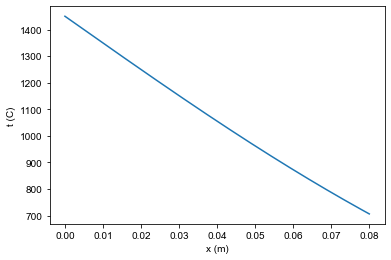

In [51]:
t_0 = 20
t_w = 1450
x_list = np.linspace(0, 80e-3, 1000)
tau = 2 * 3600
a = 0.89e-6

t_list = np.zeros(len(x_list))
for i, x in enumerate(x_list):
    t = t_x_for_constant_t_w(x, tau, t_0, t_w, a)
    t_list[i] = t

fig, ax = plt.subplots()
ax.plot(x_list, t_list)
ax.set_xlabel('x (m)')
ax.set_ylabel('t (C)')
plt.show()

## 习题03-72

In [52]:
shape = ['P', 'C']
d = 600e-3
l = 1000e-3
t_0 = 30
t_oo = 1300
tau = 1*3600
h = 232
lambda_ = 40.5
a = 0.625e-5

# 先考虑厚度方向，作为无限大平板进行分析
l_c_1 = l / 2
Bi_1 = h * l_c_1 / lambda_
Fo_1 = a * tau / l_c_1**2
mu_1 = get_mu(Bi_1, shape[0])
eta_1 = 0
ratio_m_to_0_1 = theta_to_theta_0_ratio(mu_1, eta_1, Fo_1, shape[0])

# 再考虑径向，作为无限长圆柱进行分析
l_c_2 = d / 2
Bi_2 = h * l_c_2 / lambda_
Fo_2 = a * tau / l_c_2**2
mu_2 = get_mu(Bi_2, shape[1])
eta_2 = 0
ratio_m_to_0_2 = theta_to_theta_0_ratio(mu_2, eta_2, Fo_2, shape[1])

ratio_m_to_0 = ratio_m_to_0_1 * ratio_m_to_0_2
t_m = t_oo + ratio_m_to_0 * (t_0 - t_oo)
print(f't_m = {t_m:.2f} C')

check_Fo(Fo_1, Fo_2)

t_m = 311.17 C
第1个Fo数为0.09，不满足Fo数大于0.2的公式使用条件，上述结果不可靠！
